In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


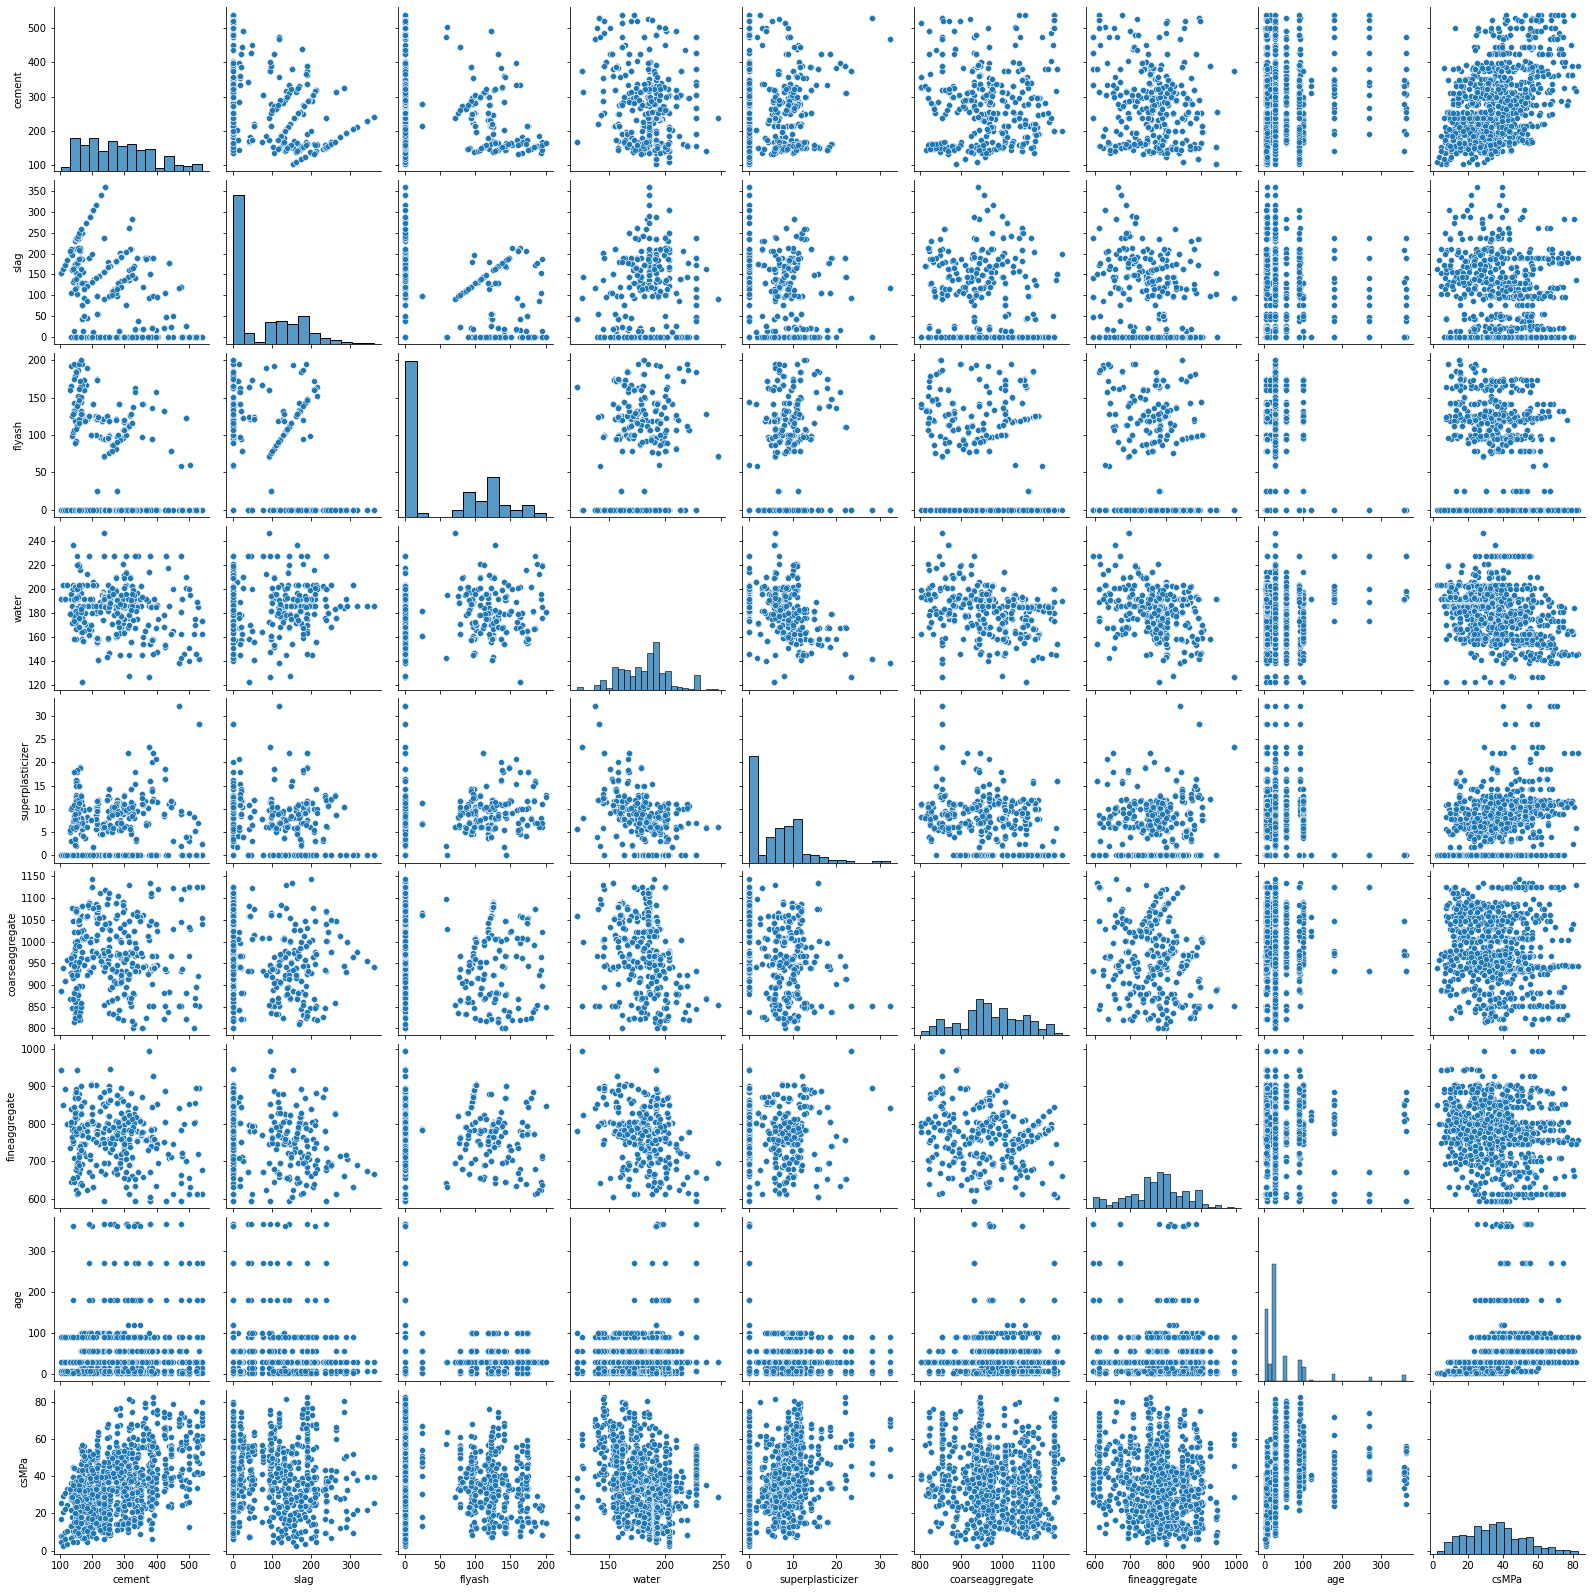

In [7]:
sns.pairplot(df)

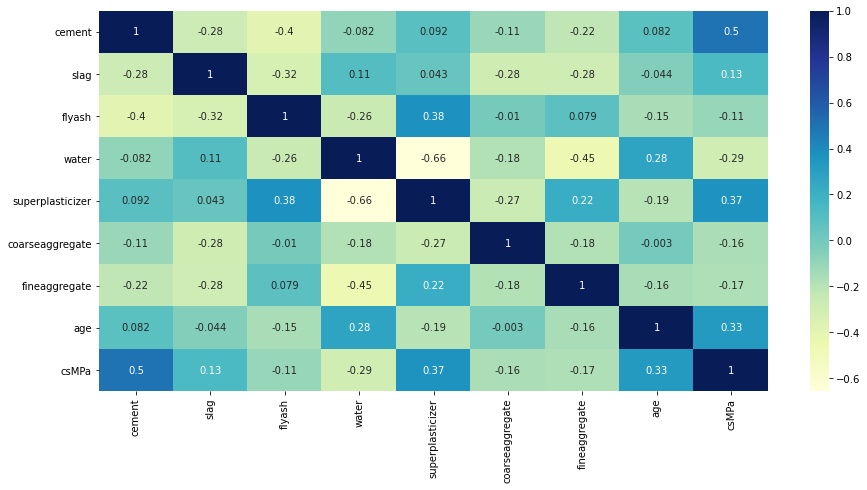

In [12]:
plt.figure(figsize=[15,7])
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [14]:
X=df.drop('csMPa', axis=1)
y=df['csMPa']

In [16]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=100)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([ 0.12415357,  0.10366839,  0.093371  , -0.13429401,  0.28804259,
        0.02065756,  0.02563037,  0.11461733])

In [22]:
lr.intercept_

-34.27352699820279

In [24]:
y_train_pred= lr.predict(X_train)

In [25]:
from sklearn import metrics

In [26]:
metrics.r2_score(y_train,y_train_pred)

0.6125047468230718

In [30]:
metrics.mean_squared_error(y_train,y_train_pred)

105.96676510674719

In [31]:
y_test_pred= lr.predict(X_test)

In [33]:
metrics.r2_score(y_test,y_test_pred)

0.622520087740484

In [34]:
lr.feature_names_in_

AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'

In [35]:
from sklearn.model_selection import cross_val_score

In [37]:
lr1=LinearRegression()

In [41]:
cv=cross_val_score(lr1,X,y,cv=5, n_jobs=-1,scoring='r2')

In [45]:
cv.mean()

0.46099404916628633

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
X=df.drop('csMPa',axis=1)
y=df[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("sc",StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6210697467843866
Testing R2
0.5911879648718987
[0.71979944 0.55030814 0.62680426 0.35784287 0.60852661 0.64955735
 0.60723933 0.74942929 0.55857665 0.56769243]
Average R2
0.5995776369504167


In [51]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer  #boxcox transform
from sklearn.model_selection import cross_val_score
X=df.drop('csMPa',axis=1)
y=df[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.8080840977706969
Testing R2
0.7997646551542748
[0.82406782 0.82312497 0.77916128 0.67511077 0.78006356 0.76090952
 0.80278288 0.87637862 0.82497253 0.80589979]
Average R2
0.7952471755402373


In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [55]:
dt=DecisionTreeClassifier()

In [80]:
pipe = Pipeline((
("pt",PowerTransformer()),
("dt", DecisionTreeRegressor(random_state=100,max_depth=11)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9854949084159793
Testing R2
0.887550135897803
[0.86662767 0.91568874 0.88471468 0.55047128 0.86954579 0.83183933
 0.77840018 0.89495994 0.7960374  0.82274647]
Average R2
0.8211031476335057


In [73]:
pipe = Pipeline((
("pt",PowerTransformer()),
("rf", RandomForestRegressor(random_state=100)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.984409480740313
Testing R2
0.9197900880962901
[0.9027534  0.93165254 0.91377411 0.7429755  0.91407706 0.89138329
 0.89813283 0.91914783 0.9188587  0.90566342]
Average R2
0.8938418672730053


In [89]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge
X=df.drop('csMPa',axis=1)
y=df[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt", PowerTransformer()),
("poly",PolynomialFeatures(degree=2)),
("lr", LinearRegression())
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.8862102587272438
Testing R2
0.8693185642957083
[0.85955564 0.88585786 0.86074545 0.7434244  0.84908628 0.86873768
 0.85226966 0.93265428 0.8801613  0.84936551]
Average R2
0.858185806795172


In [91]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
X=df.drop('csMPa',axis=1)
y=df[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=3)),
("rfe",RFE(estimator=LinearRegression(),n_features_to_select=70)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9290736283119139
Testing R2
0.9139744254138862
[0.8791217  0.8622758  0.87701059 0.81614708 0.89297175 0.92354062
 0.78626263 0.94093591 0.78263827 0.80604357]
Average R2
0.856694790644009


In [93]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
X=df.drop('csMPa',axis=1)
y=df[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=3)),
("pca",PCA(n_components=100)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print()
print(pipe['pca'].explained_variance_ratio_)

Training R2
0.9128727636717026
Testing R2
0.8952418869608232
[0.88707796 0.88382849 0.850563   0.73114013 0.91112353 0.87205186
 0.91613726 0.92852567 0.86006615 0.82334403]
Average R2
0.8663858066098502

[2.15280592e-01 1.09183333e-01 1.01954231e-01 5.92864375e-02
 5.55839677e-02 4.16287563e-02 2.98326803e-02 2.49288126e-02
 2.28337896e-02 2.03360687e-02 1.81909377e-02 1.66681798e-02
 1.57906802e-02 1.53152999e-02 1.37357094e-02 1.26471511e-02
 1.17074910e-02 1.11183245e-02 9.87953078e-03 9.48813929e-03
 9.27406870e-03 8.72082068e-03 8.20359178e-03 7.59015177e-03
 6.90003720e-03 6.49984384e-03 6.05806962e-03 5.78582638e-03
 5.60743248e-03 5.52983791e-03 5.24804478e-03 5.07042081e-03
 4.76715671e-03 4.48506992e-03 4.23765717e-03 4.14396010e-03
 3.88270902e-03 3.70491702e-03 3.58224192e-03 3.34361343e-03
 3.30874147e-03 3.09712240e-03 3.04309560e-03 2.88541661e-03
 2.75966284e-03 2.54243489e-03 2.53132283e-03 2.47911380e-03
 2.33108193e-03 2.19089690e-03 2.11196836e-03 2.03325493e-03
 1

In [94]:
#With Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
X=df.drop('csMPa',axis=1)
y=df[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", GradientBoostingRegressor(n_estimators=1500,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9927791355401739
Testing R2
0.9429121083307876
[0.93470484 0.94893304 0.93794847 0.7914136  0.93028301 0.94583299
 0.94869327 0.96120263 0.92275758 0.89757368]
Average R2
0.9219343121120571


In [95]:
#With Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
X=df.drop('csMPa',axis=1)
y=df[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", AdaBoostRegressor(n_estimators=10,base_estimator=LinearRegression(),random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6142957558574607
Testing R2
0.5869666439743112
[0.71313474 0.56300258 0.6046258  0.38858946 0.61876149 0.64043809
 0.61862094 0.72828601 0.55533087 0.5825105 ]
Average R2
0.6013300480615987


Automatically created module for IPython interactive environment


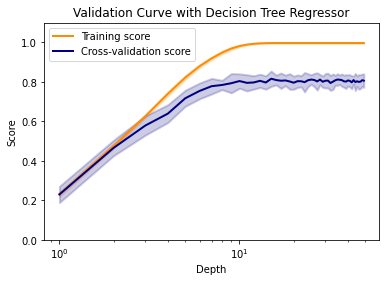

In [96]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), Xtrain, ytrain, param_name="max_depth", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


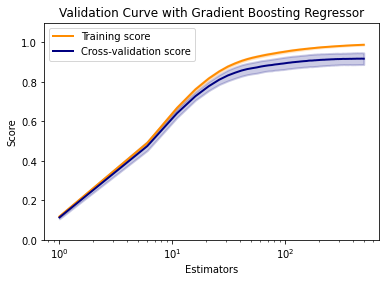

In [97]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,500,5)
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), Xtrain, ytrain, param_name="n_estimators", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [98]:
#Hyperparameter Tuning with Pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures()),
("rfe",RFE(estimator=LinearRegression())),
("lr", LinearRegression()),
))
param_grid = {
    'poly__degree' : [1,2,3],
    'rfe__n_features_to_select' : [10,20,30,40,50,60,70,80,90,100]
}
search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('pt', PowerTransformer()),
                                       ('poly', PolynomialFeatures()),
                                       ('rfe',
                                        RFE(estimator=LinearRegression())),
                                       ('lr', LinearRegression()))),
             param_grid={'poly__degree': [1, 2, 3],
                         'rfe__n_features_to_select': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]})

In [99]:
#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pt",PowerTransformer()),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=DecisionTreeRegressor()
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.79114224 0.83004564 0.83054353 0.45889179 0.72274247 0.80799206
 0.51263488 0.80922124 0.75135771 0.80033118]
Average R2
0.731490273452705
SD of accuracy
0.1274345381618537
Coefficient of Variation
0.17421221140829438


In [100]:
import warnings
warnings.filterwarnings('ignore')
#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pt",PowerTransformer()),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=GradientBoostingRegressor(n_estimators=1500)
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.92772174 0.92836536 0.8958741  0.7302431  0.87621559 0.91456224
 0.8943065  0.92703741 0.88951958 0.90753849]
Average R2
0.889138408808962
SD of accuracy
0.05561981415431663
Coefficient of Variation
0.06255473119063847


In [101]:
#Hyperparameter Tuning with Pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures()),
("pt",PowerTransformer()),
("pca",PCA()),
("xb",GradientBoostingRegressor())
))
param_grid = {
    'poly__degree' : [2,3],
    'pca__n_components' : [30,40],
    'xb__n_estimators' : [10,20,30,40,50]
}
search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('sc', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('pt', PowerTransformer()),
                                       ('pca', PCA()),
                                       ('xb', GradientBoostingRegressor()))),
             param_grid={'pca__n_components': [30, 40], 'poly__degree': [2, 3],
                         'xb__n_estimators': [10, 20, 30, 40, 50]})

In [103]:
import warnings
warnings.filterwarnings('ignore')
#Model Comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,VotingRegressor
from sklearn import model_selection
X=df.drop('csMPa',axis=1)
y=df[['csMPa']]
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=1000)
gb = GradientBoostingRegressor(n_estimators=1500)
vr = VotingRegressor(estimators = [('lr',lr),('dt', dt)])
models = []
models.append(('Linear Regression',lr))
models.append(('Decision Tree Regression',dt))
models.append(('Random Forest Regression',rf))
models.append(('Gradient Boosting Regression',gb))
models.append(('Voting Regressor',vr))

Linear Regression: 0.607883 (0.101906)
Decision Tree Regression: 0.852560 (0.105507)
Random Forest Regression: 0.912815 (0.051306)
Gradient Boosting Regression: 0.936656 (0.046780)
Voting Regressor: 0.834514 (0.064271)


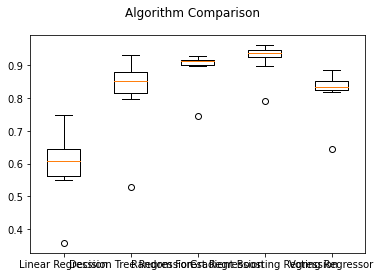

In [104]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

In [84]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [85]:
# evaluate knn on the box-cox sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)


In [86]:
# evaluate knn on the yeo-johnson sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)
>4 0.795 (0.079)


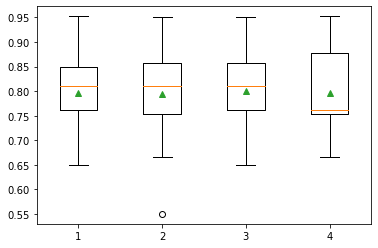

In [87]:
# explore the effect of degree on accuracy for the polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
	# load dataset
	url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
	dataset = read_csv(url, header=None)
	data = dataset.values
	# separate into input and output columns
	X, y = data[:, :-1], data[:, -1]
	# ensure inputs are floats and output is an integer label
	X = X.astype('float32')
	y = LabelEncoder().fit_transform(y.astype('str'))
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for d in range(1,5):
		# define the pipeline
		trans = PolynomialFeatures(degree=d)
		model = KNeighborsClassifier()
		models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()